## <h1><center>Lead Scoring Case Study</center></h1>

### Table of Conents <a ID=0.1></a>

1. [Problem Statement](#1)
2. [Reading and Understanding Data](#2)
3. [Data Cleansing](#3)
4. [EDA](#4)
    1. [Univariate Analysis](#4.1)
    2. [Bivariate Analysis](#4.2)

5. [Creating dummy variables and Splitting the data into train and test sets](#5)
6. [Rescaling numerical features](#6)
7. [Feature elimination using RFE](#7)
8. [Model Building](#8)
9. [Metrics on Training set and Finding Optimal Cutoff Probability](#9)
10. [Making Predictions on Test set](#10)
11. [Lead Scores](#11)

## 1. Problem Statement: <a ID=1></a>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

The company wants to —


- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## 2. Reading and Understanding data<a ID=2></a>
[Table of Contents](#0.1)

In [1]:
# importing all necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 100)

In [2]:
lead_data = pd.read_csv('Leads.csv')

# Checking top 5 rows
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the shape of dataframe

lead_data.shape

(9240, 37)

In [4]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Statistical summary of Applications DataFrame

lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking if there are any duplicates present in prospect_ID and Lead_Number

print('Number of duplicates present in \'Prospect ID\' column: ', sum(lead_data.duplicated(subset = 'Prospect ID')))
print('Number of duplicates present in \'Lead Number\' column: ', sum(lead_data.duplicated(subset = 'Lead Number')))

Number of duplicates present in 'Prospect ID' column:  0
Number of duplicates present in 'Lead Number' column:  0


In [7]:
# Checking Balance ratio

round((sum(lead_data.Converted)/len(lead_data.Converted))*100,2)

38.54

### Findings <a ID="5.2.1"></a>
[Table of Contents](#0.1)

After understanding the data, we can see that
   - Null values are present in multiple columns, which are needs to be treated
   - outliers are present in Total Visits, Total time spent on website and Page views per visit columns which are needed to be handled
   - Balnce ratio of dataset is ~ 38% . i.e, 38% of Leads are being converted

### 3 Data Cleaning <a ID="3"></a>
[Table of Contents](#0.1)

In [8]:
# Checking percentage of null values in dataframe

def null_percentage(df):
    null_dict = {'Column':[],'null %':[]}
    for col in df.columns:
        null_dict['Column'].append(col)
        null_dict['null %'].append(df[col].isnull().sum()*(100/len(df[col])))
    null_df = pd.DataFrame(null_dict)
    null_df = null_df.sort_values('null %',ascending=False,ignore_index=True)
    return null_df

In [9]:
null_percentage(lead_data)

,Column,null %
0,Lead Quality,51.590909
1,Asymmetrique Activity Index,45.649351
2,Asymmetrique Profile Score,45.649351
3,Asymmetrique Activity Score,45.649351
4,Asymmetrique Profile Index,45.649351
5,Tags,36.287879
6,Lead Profile,29.318182
7,What matters most to you in choosing a course,29.318182
8,What is your current occupation,29.112554
9,Country,26.634199


In [10]:
# Many of the categorical variables have a level called 'Select',which needs to be handled. Replacing 'Select' with Nan

lead_data = lead_data.replace('Select',np.nan)

In [11]:
# Rechecking Null values

null_percentage(lead_data)

,Column,null %
0,How did you hear about X Education,78.463203
1,Lead Profile,74.188312
2,Lead Quality,51.590909
3,Asymmetrique Profile Score,45.649351
4,Asymmetrique Activity Score,45.649351
5,Asymmetrique Activity Index,45.649351
6,Asymmetrique Profile Index,45.649351
7,City,39.707792
8,Specialization,36.580087
9,Tags,36.287879


### Dropping columns with more than 40% null values

In [12]:
for col in null_percentage(lead_data)[null_percentage(lead_data)['null %']>40].Column:
    lead_data.drop(columns=col,inplace=True)

In [13]:
# Renaming columns

lead_data.rename(columns = {'Prospect ID':'Prospect_ID',
                              'Lead Number':'Lead_Number',
                             'Lead Origin':'Lead_Origin',
                            'Lead Source':'Lead_source',
                              'Do Not Email':'No_email',
                              'Do Not Call':'No_calls',
                              'Total Time Spent on Website':'Time_spent',
                              'Page Views Per Visit':'Page_views',
                             'Last Activity':'Last_activity',
                              'What is your current occupation':'Occupation',
                              'What matters most to you in choosing a course':'Reason_for_Choosing',
                               'Newspaper Article':'News_article',
                               'X Education Forums':'Forums',
                              'Digital Advertisement':'Ads',
                               'Through Recommendations':'Recommendation',
                              'Receive More Updates About Our Courses':'Course_updates',
                               'Update me on Supply Chain Content':'Updates',
                              'Get updates on DM Content':'Content_updates',
                               'I agree to pay the amount through cheque':'Pay_cheque',
                              'A free copy of Mastering The Interview':'Free_copy',
                               'Last Notable Activity':'Last_notable_activity'},
                                inplace = True)

In [14]:
# Dropping unwanted columns columns

lead_data.drop(columns=['Updates','Last_activity','Prospect_ID'],inplace=True)

In [15]:
# Grouping categories with less value counts into others in Lead Source column

lead_data.Lead_source.replace(['Reference','Welingak Website','Referral Sites','Facebook',
                              'bing','Click2call','Press_Release','Social Media','Live Chat',
                              'youtubechannel','testone','Pay per Click Ads','welearnblog_Home',
                              'WeLearn','blog','NC_EDM'],'Others',inplace=True)
lead_data.Lead_source.replace('google','Google',inplace=True)

# Renaming Occupation column
lead_data.Reason_for_Choosing.replace({'Better Career Prospects':'Carrer_Prospects','Flexibility & Convenience':'Flexibility'},inplace =True)


# Dropping below  columna since there is only categorical level 'No'
lead_data.drop(columns=['Magazine','Course_updates','Content_updates','Pay_cheque'],inplace=True)



### Imputing missing values

In [16]:
# Categorical

for col in lead_data.columns:
    if lead_data[col].dtype == 'object':
        lead_data[col].fillna(lead_data[col].mode()[0],inplace=True)

In [17]:
# Numerical

for col in lead_data.columns:
    if lead_data[col].dtype == 'int64' or lead_data[col].dtype == 'float64':
        lead_data[col].fillna(lead_data[col].median(),inplace=True)

### Rechecking null values

In [18]:
null_percentage(lead_data)

,Column,null %
0,Lead_Number,0.0
1,Reason_for_Choosing,0.0
2,Free_copy,0.0
3,City,0.0
4,Tags,0.0
5,Recommendation,0.0
6,Ads,0.0
7,Newspaper,0.0
8,Forums,0.0
9,News_article,0.0


### 4 EDA <a ID="4"></a>
[Table of Contents](#0.1)

### 4.1 Univariate - Categorical <a ID="4.1"></a>
[Table of Contents](#0.1)

value Counts for Lead_Origin column are: 

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead_Origin, dtype: float64

..................................................

Mode of Lead_Origin column:  Landing Page Submission

..................................................


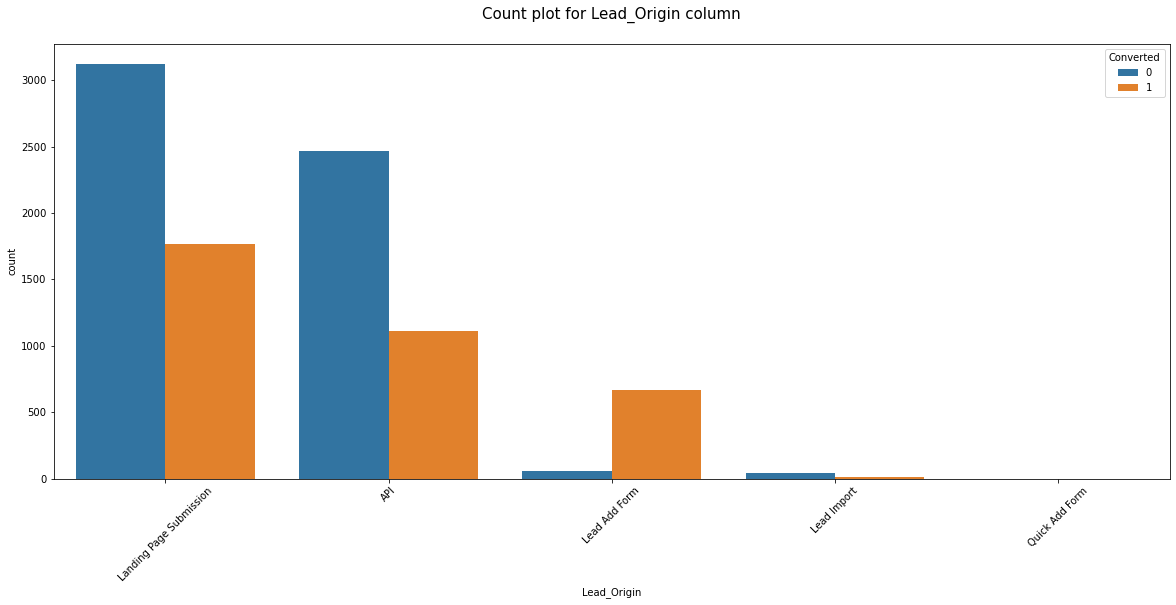


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Lead_source column are: 

Google            0.314827
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Others            0.095130
Name: Lead_source, dtype: float64

..................................................

Mode of Lead_source column:  Google

..................................................


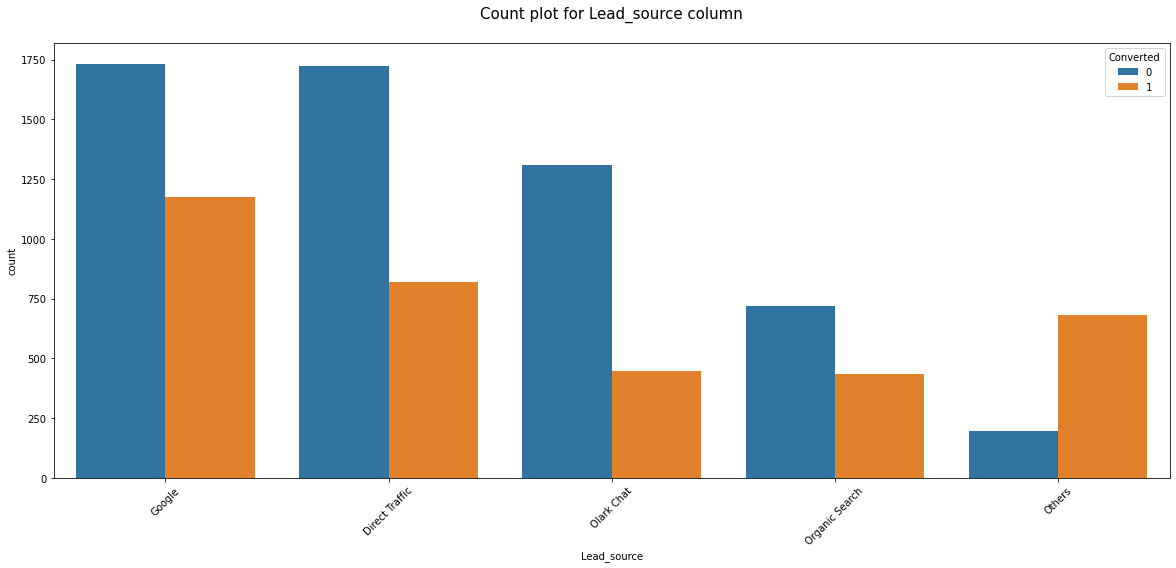


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for No_email column are: 

No     0.920563
Yes    0.079437
Name: No_email, dtype: float64

..................................................

Mode of No_email column:  No

..................................................


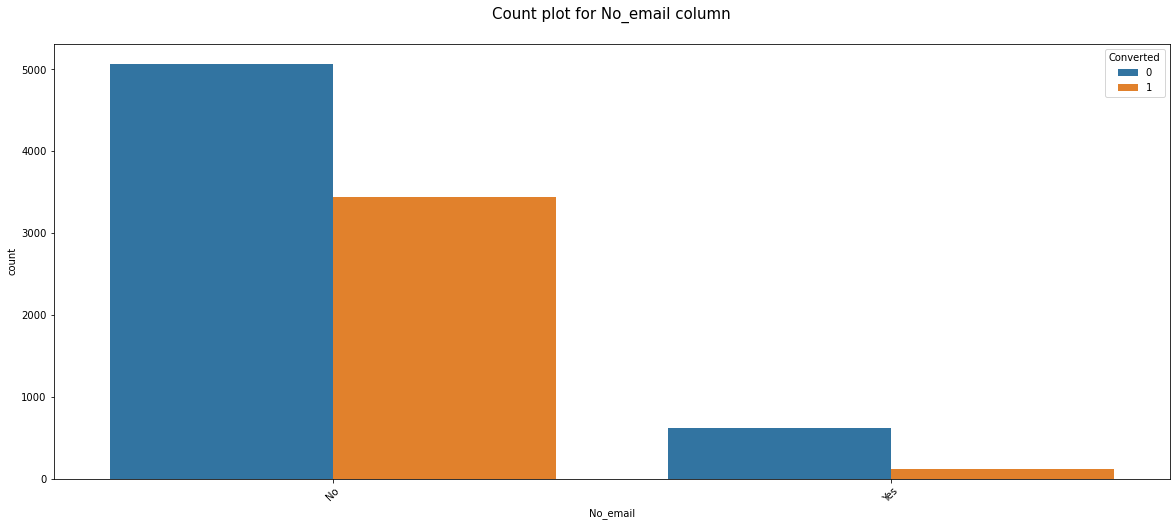


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for No_calls column are: 

No     0.999784
Yes    0.000216
Name: No_calls, dtype: float64

..................................................

Mode of No_calls column:  No

..................................................


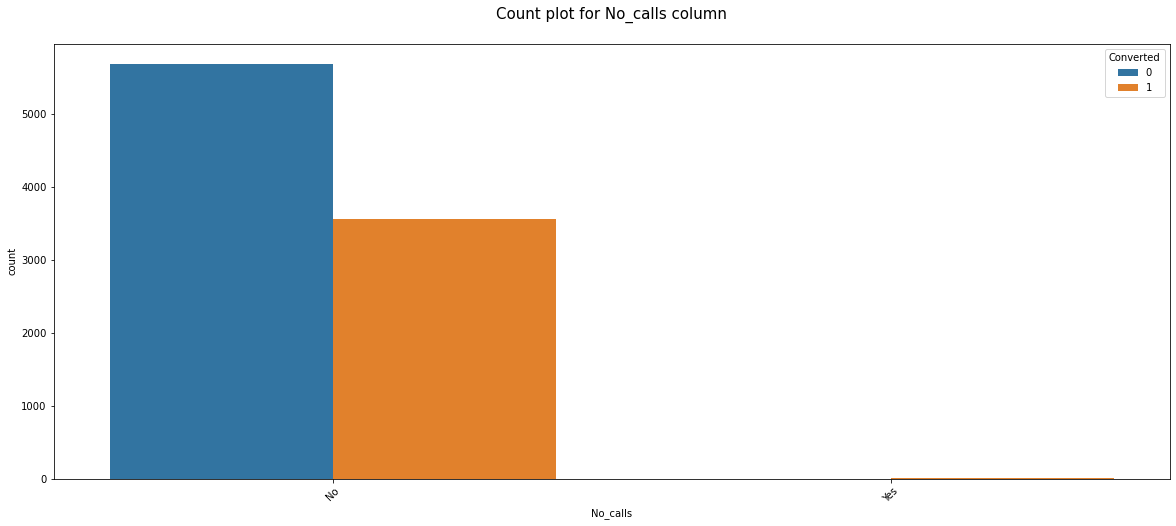


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Country column are: 

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
Belgium                 0.000216
Philippines             0.000216
Ghana                   0.000216
Netherlands             0.000216
China                   0.000216
Italy                   0.000216
Bangladesh              0.000216
Uganda                  0.000216
Asia/Pac

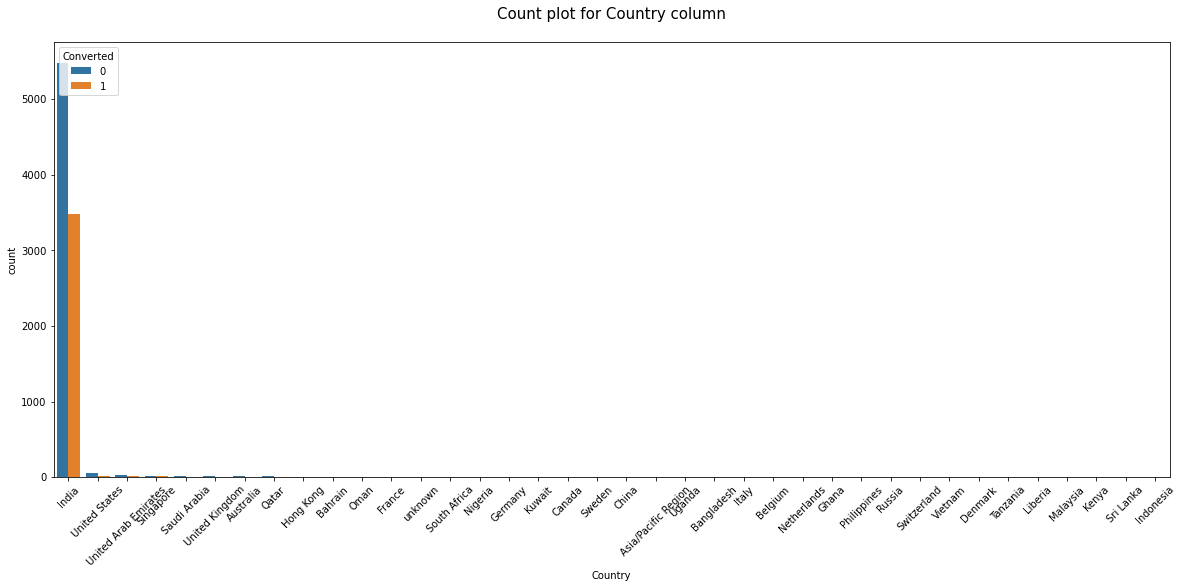


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Specialization column are: 

Finance Management                   0.471429
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

..........................

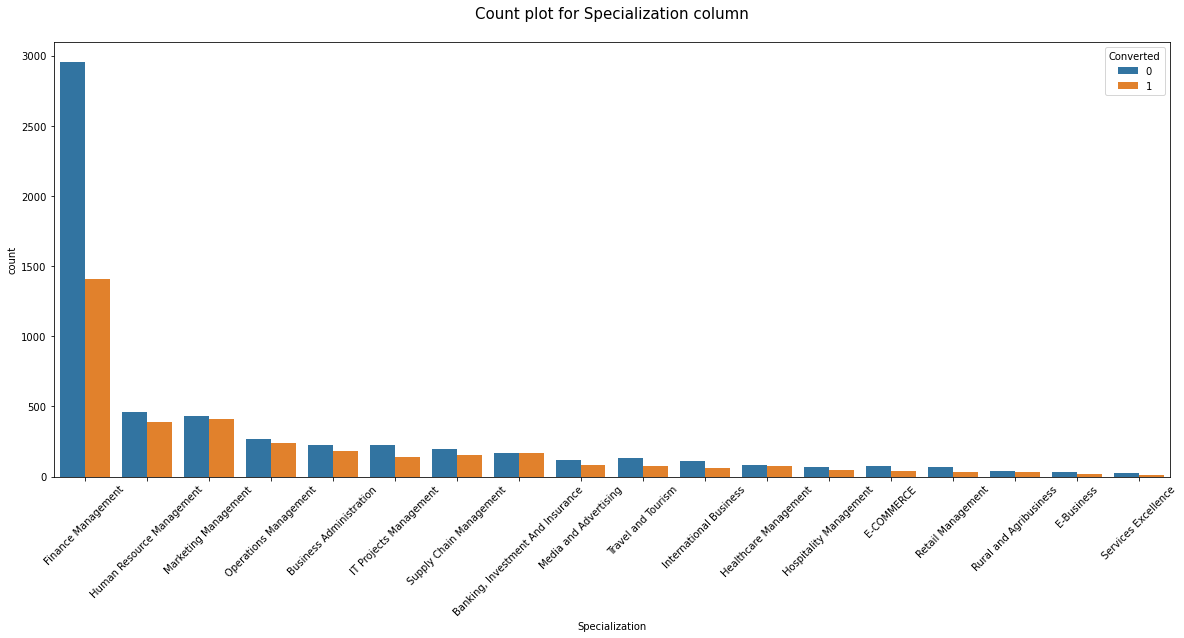


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Occupation column are: 

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: Occupation, dtype: float64

..................................................

Mode of Occupation column:  Unemployed

..................................................


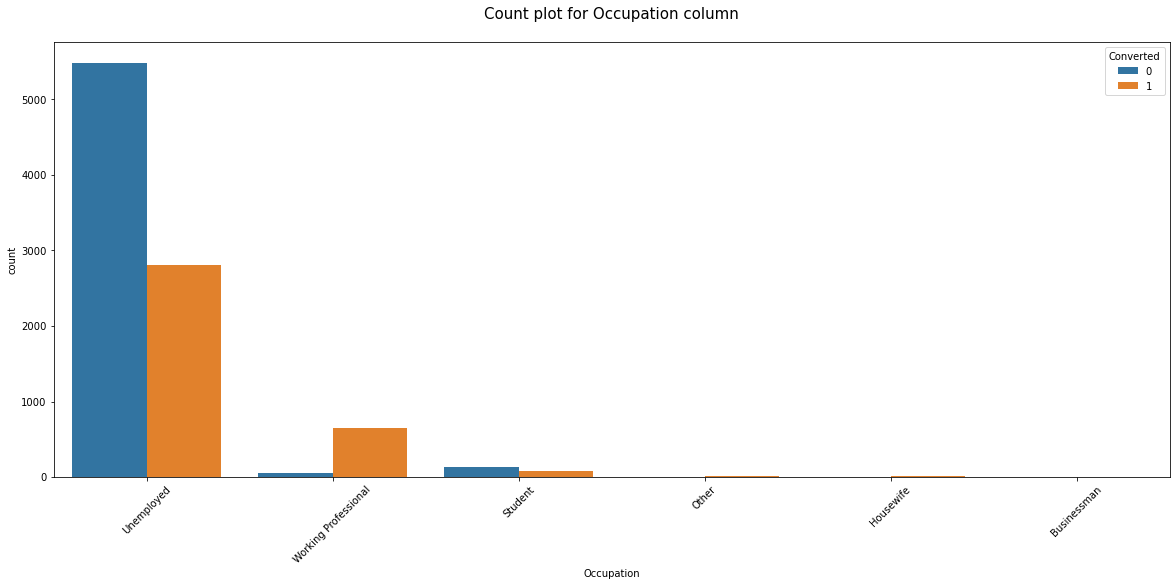


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Reason_for_Choosing column are: 

Carrer_Prospects    0.999675
Flexibility         0.000216
Other               0.000108
Name: Reason_for_Choosing, dtype: float64

..................................................

Mode of Reason_for_Choosing column:  Carrer_Prospects

..................................................


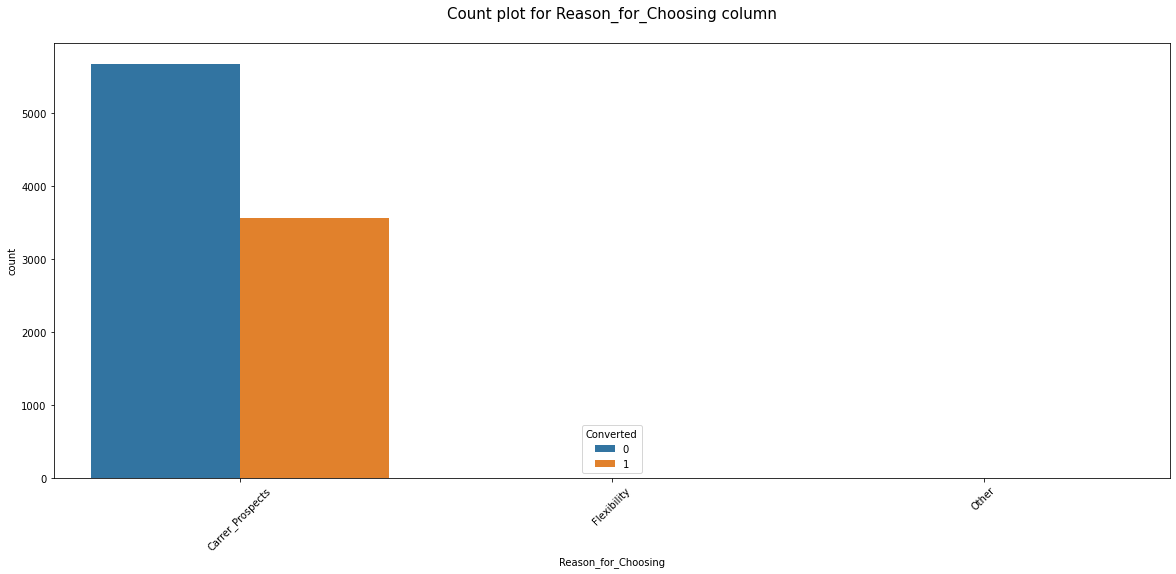


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Search column are: 

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

..................................................

Mode of Search column:  No

..................................................


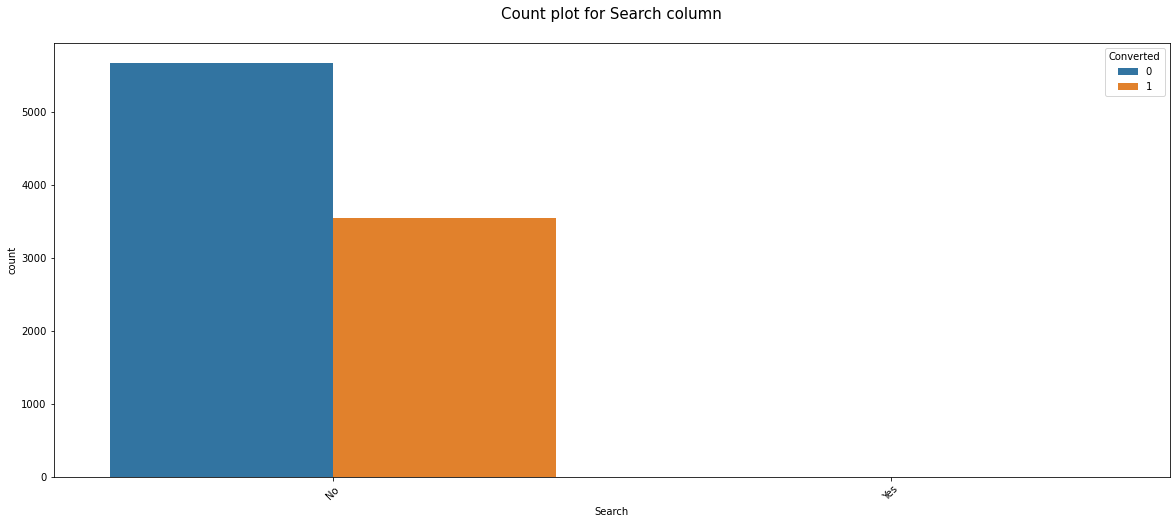


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for News_article column are: 

No     0.999784
Yes    0.000216
Name: News_article, dtype: float64

..................................................

Mode of News_article column:  No

..................................................


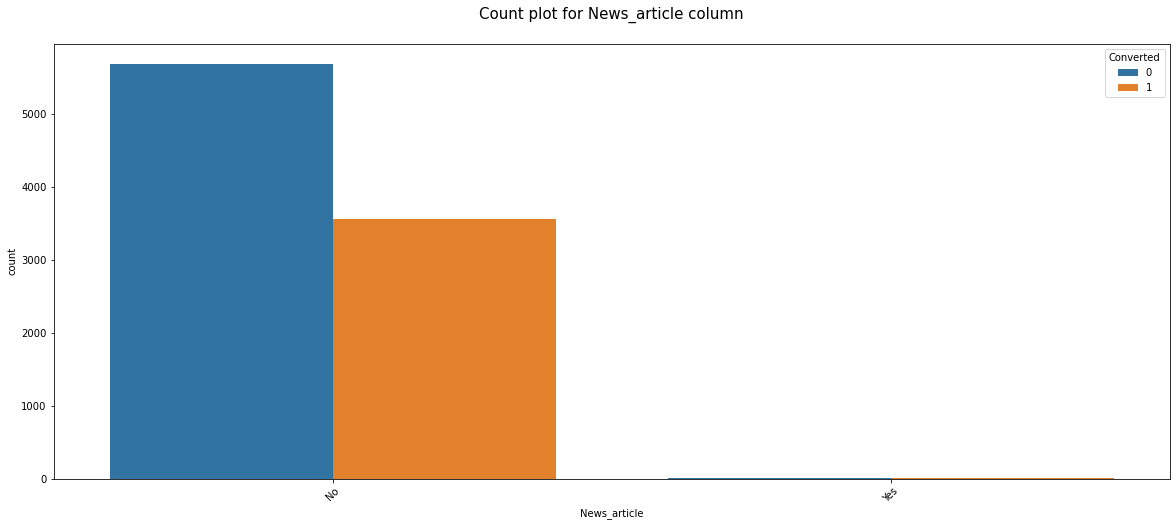


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Forums column are: 

No     0.999892
Yes    0.000108
Name: Forums, dtype: float64

..................................................

Mode of Forums column:  No

..................................................


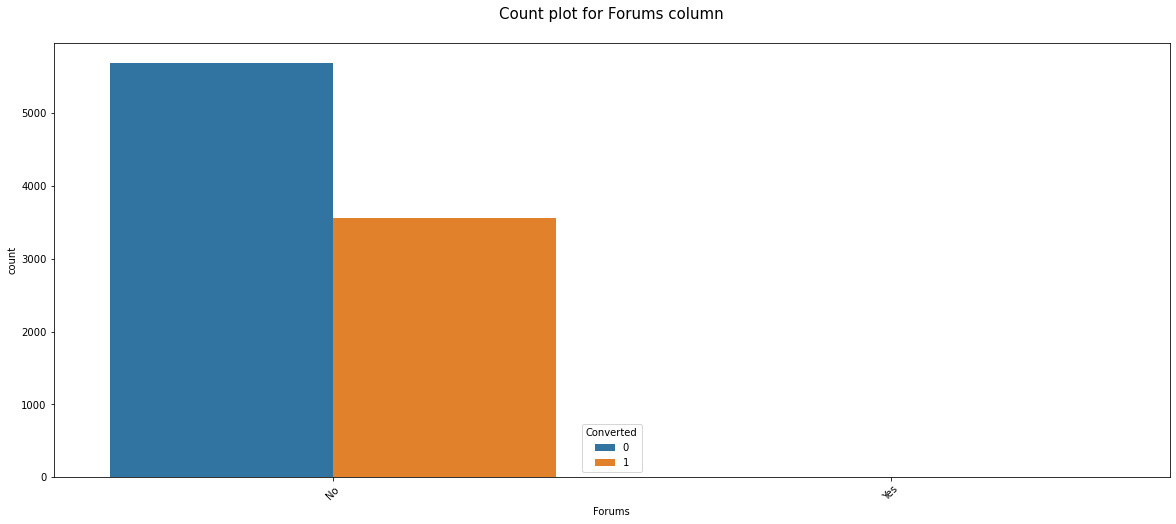


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Newspaper column are: 

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

..................................................

Mode of Newspaper column:  No

..................................................


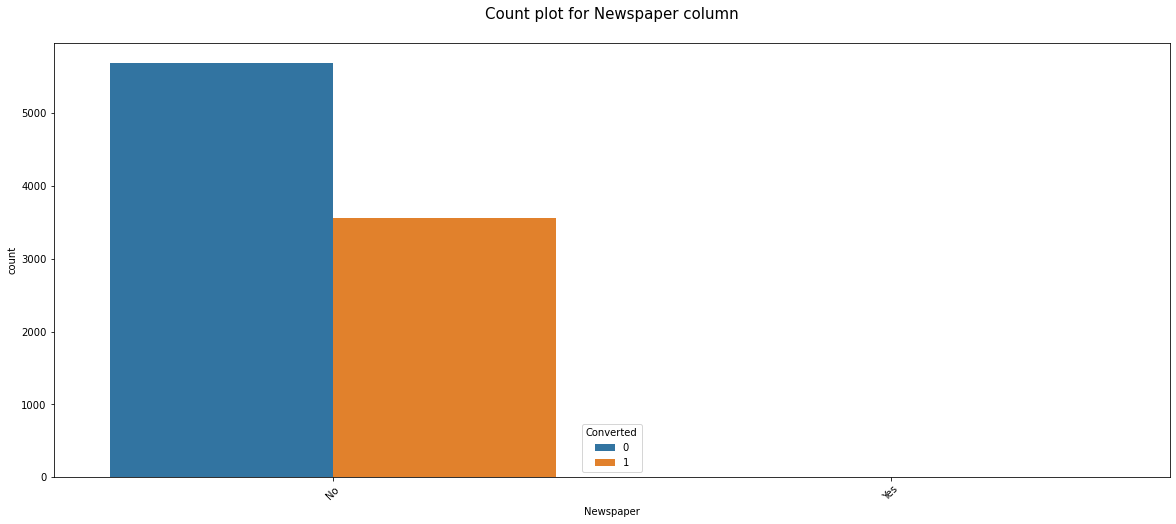


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Ads column are: 

No     0.999567
Yes    0.000433
Name: Ads, dtype: float64

..................................................

Mode of Ads column:  No

..................................................


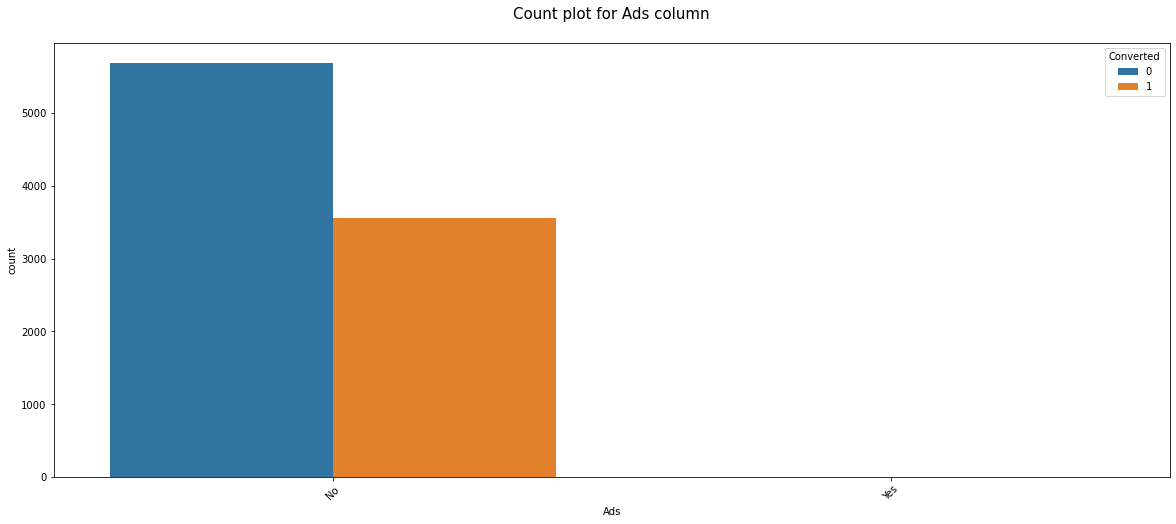


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Recommendation column are: 

No     0.999242
Yes    0.000758
Name: Recommendation, dtype: float64

..................................................

Mode of Recommendation column:  No

..................................................


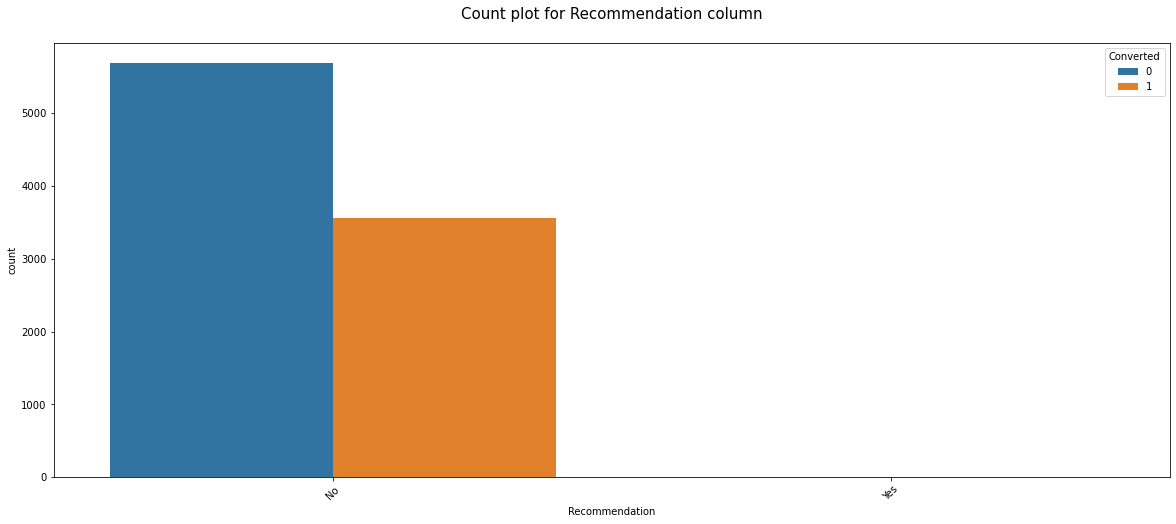


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Tags column are: 

Will revert after reading the email                  0.587121
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                        

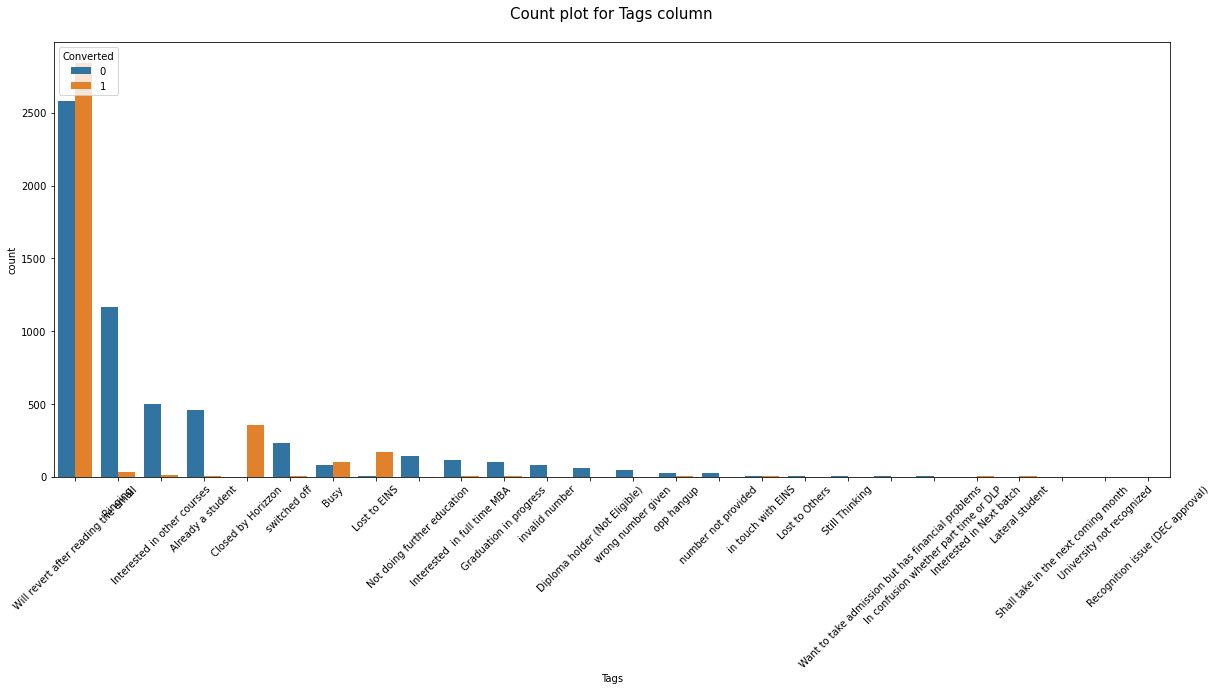


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for City column are: 

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

..................................................

Mode of City column:  Mumbai

..................................................


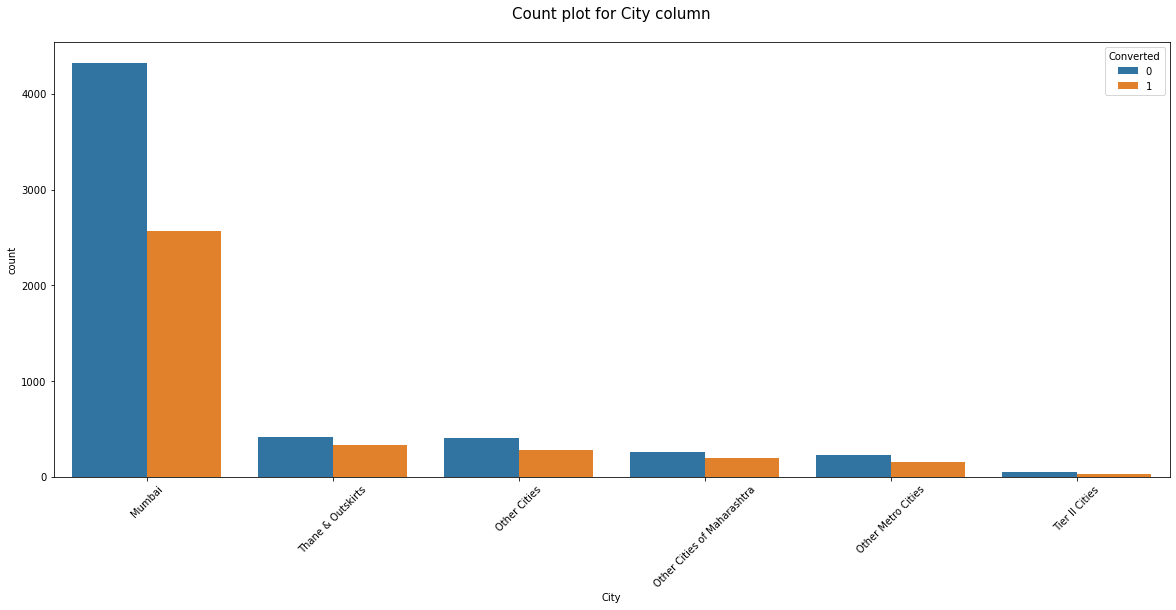


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Free_copy column are: 

No     0.687446
Yes    0.312554
Name: Free_copy, dtype: float64

..................................................

Mode of Free_copy column:  No

..................................................


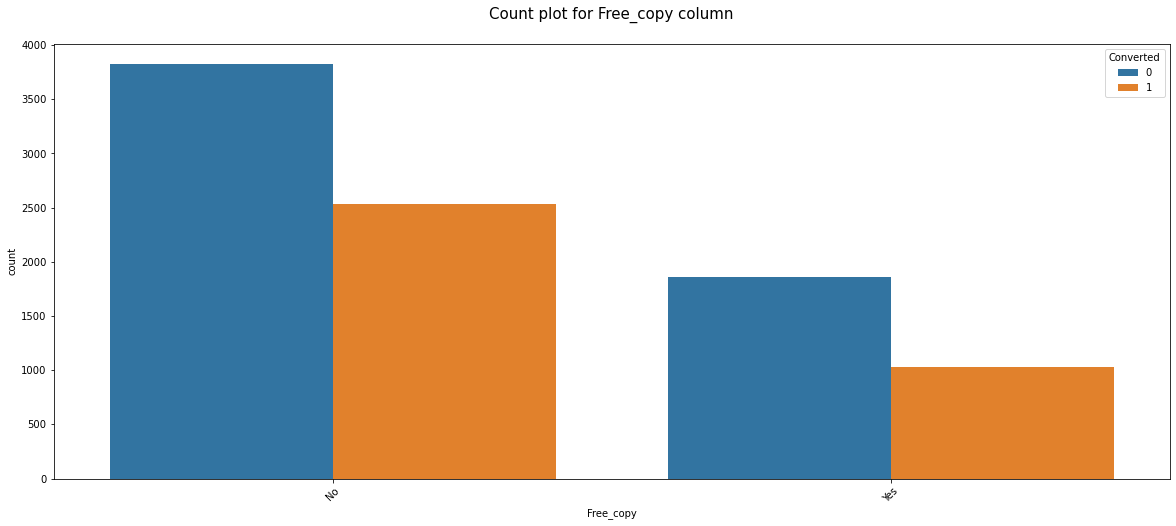


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
value Counts for Last_notable_activity column are: 

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last_notable_activity, dtype: float64

..................................................

Mode of Last_notable_activity column:  Modified

..................................................


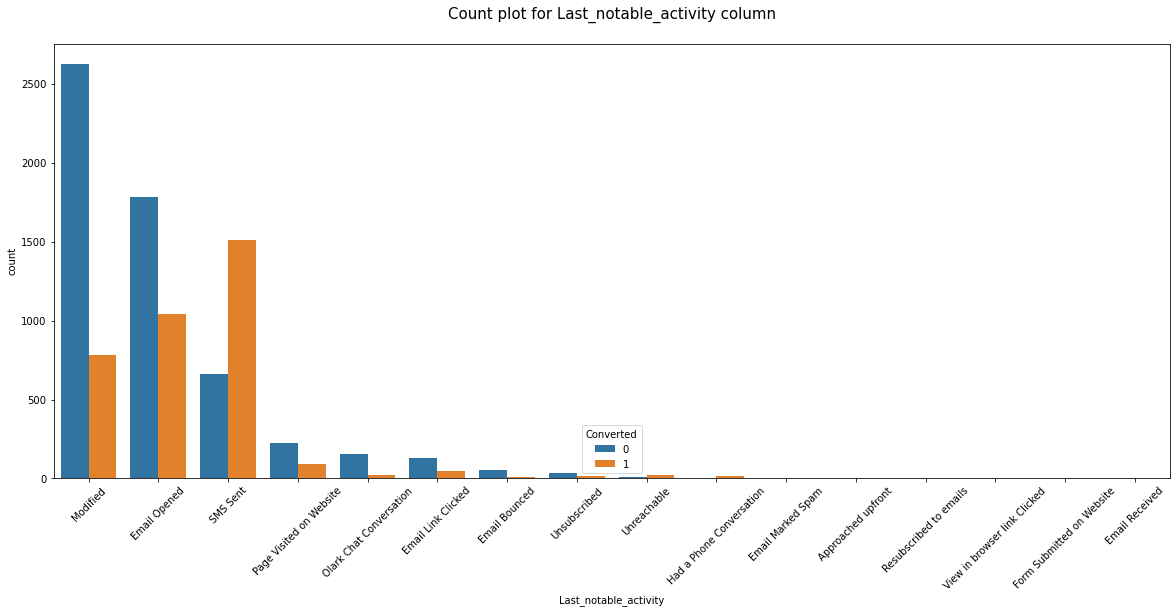


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [19]:
# Cheking catergorical Columns
for col in lead_data.columns:
    if lead_data[col].dtype == 'object':
        print('value Counts for {} column are: '.format(col))
        print()
        print(lead_data[col].value_counts(normalize=True).sort_values(ascending=False))
        print()
        print('.'*50)
        print()
        print('Mode of {} column: '.format(col), lead_data[col].mode()[0])
        print()
        print('.' * 50)
        
        plt.figure(figsize = [20,8])
        sns.countplot(lead_data[col],order = lead_data[col].value_counts().index,hue=lead_data.Converted)
        plt.xticks(rotation=45)
        plt.title('Count plot for {} column\n'.format(col),fontdict={'color':'k','fontsize':15})
        plt.show()
        print()
        print('X'*60)

### Inferences:
[Table of Contents](#0.1)

- Lead origin
    - Maximum leads are originated from Landing Page Submission and API
    - Conversion rate is also high from these
- Lead Source
    - Maximum leads are sourced from Google and Direct Traffic
    - Conversion rate is also high for these
- Most of the leads have opted for email and phone call commnications
- Country
    - ~96% of leads are from India
- Specialization 
    - Most of the leads have `Finance and Human Resource Management` specialization
- Occupation
    - 85% of leads are unemployed with high conversion rate
- Reason_for_Choosing 
    - ~99% of leads are choosing the plaform for better career prospects
- City
    - Most of the leads are from Mumbai with high conversion rate

### Univariate - Numerical 

Statistical information for Lead_Number column: 

count      9240.000000
mean     617188.435606
std       23405.995698
min      579533.000000
25%      596484.500000
50%      615479.000000
75%      637387.250000
max      660737.000000
Name: Lead_Number, dtype: float64

............................................................

Minimum value in Lead_Number column:  579533
Maximum value in Lead_Number column:  660737

............................................................

Percentage of null values for Lead_Number column:  0.0

............................................................



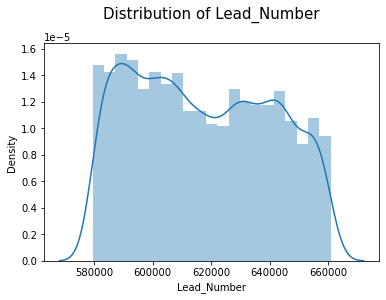


............................................................
Box plot of Lead_Number column:


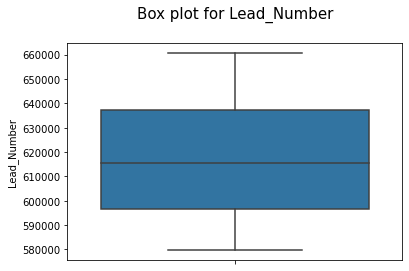

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Statistical information for Converted column: 

count    9240.000000
mean        0.385390
std         0.486714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

............................................................

Minimum value in Converted column:  0
Maximum value in Converted column:  1

............................................................

Percentage of null values for Converted column:  0.0

............................................................



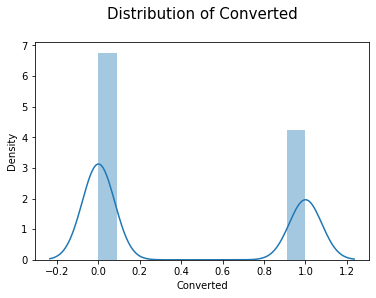


............................................................
Box plot of Converted column:


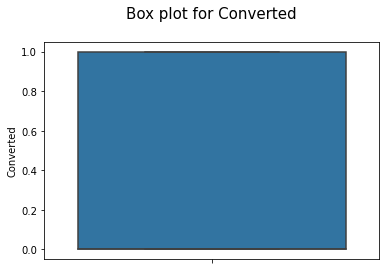

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Statistical information for TotalVisits column: 

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

............................................................

Minimum value in TotalVisits column:  0.0
Maximum value in TotalVisits column:  251.0

............................................................

Percentage of null values for TotalVisits column:  0.0

............................................................



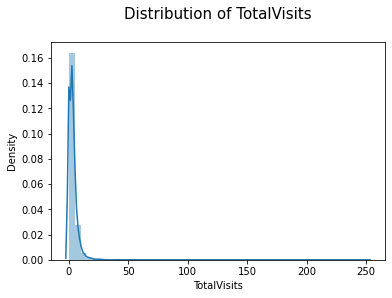


............................................................
Box plot of TotalVisits column:


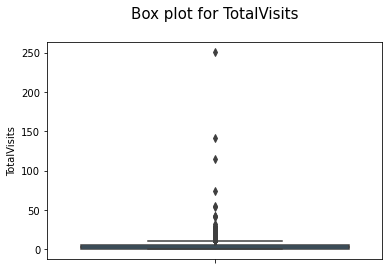

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Statistical information for Time_spent column: 

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Time_spent, dtype: float64

............................................................

Minimum value in Time_spent column:  0
Maximum value in Time_spent column:  2272

............................................................

Percentage of null values for Time_spent column:  0.0

............................................................



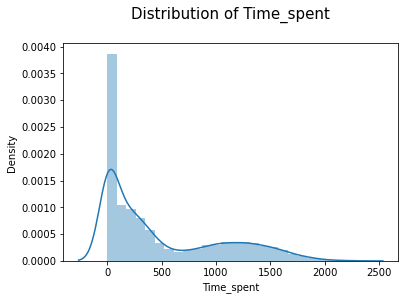


............................................................
Box plot of Time_spent column:


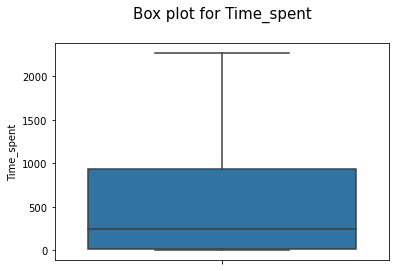

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Statistical information for Page_views column: 

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page_views, dtype: float64

............................................................

Minimum value in Page_views column:  0.0
Maximum value in Page_views column:  55.0

............................................................

Percentage of null values for Page_views column:  0.0

............................................................



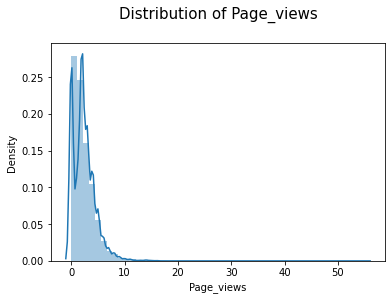


............................................................
Box plot of Page_views column:


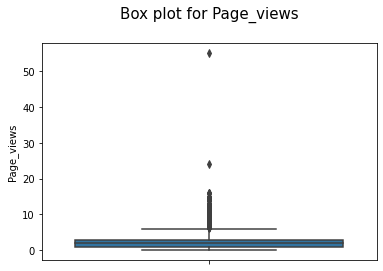

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [20]:
for col in lead_data.columns:
    if lead_data[col].dtype == 'int64' or lead_data[col].dtype == 'float64':
        print('Statistical information for {} column: '.format(col))
        print()
        print(lead_data[col].describe())
        print()
        print('.' * 60)
        print()
        print('Minimum value in {} column: '.format(col),lead_data[col].min())
        print('Maximum value in {} column: '.format(col),lead_data[col].max())
        print()
        print('.' * 60)
        print()
        print('Percentage of null values for {} column: '.format(col), lead_data[col].isnull().sum()*100/len(lead_data))
        print()
        print('.' * 60)
        print()
        sns.distplot(lead_data[col])
        plt.title('Distribution of {}\n'.format(col),fontdict={'fontsize':15,'color':'k'})
        plt.show()
        print()
        print('.'*60)
        print('Box plot of {} column:'.format(col))
        sns.boxplot(y=lead_data[col])
        plt.title('Box plot for {}\n'.format(col),fontdict={'fontsize':15,'color':'k'})
        plt.show()
        print('X'*60)

### Inferences:
[Table of Contents](#0.1)

- Total visits on website & Page views per visit
    - There are outliers in these columns which needs to be treated


### Handling Outliers

<AxesSubplot:>

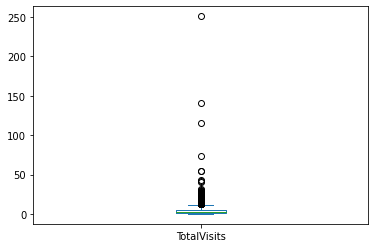

In [21]:
lead_data.TotalVisits.plot.box()

In [22]:
lead_data = lead_data[~(lead_data.TotalVisits >50)]

<AxesSubplot:>

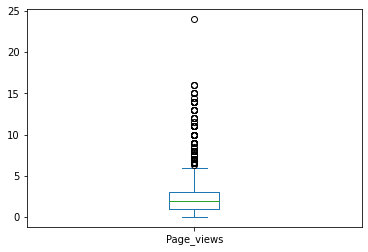

In [23]:
lead_data.Page_views.plot.box()

In [24]:
lead_data = lead_data[~(lead_data.Page_views >10)]

In [25]:
lead_data.shape

(9186, 23)

### 4.2 Bi-variate Analysis <a ID="4.2"></a>
#### Numeric-Numeric

[Table of Contents](#0.1)


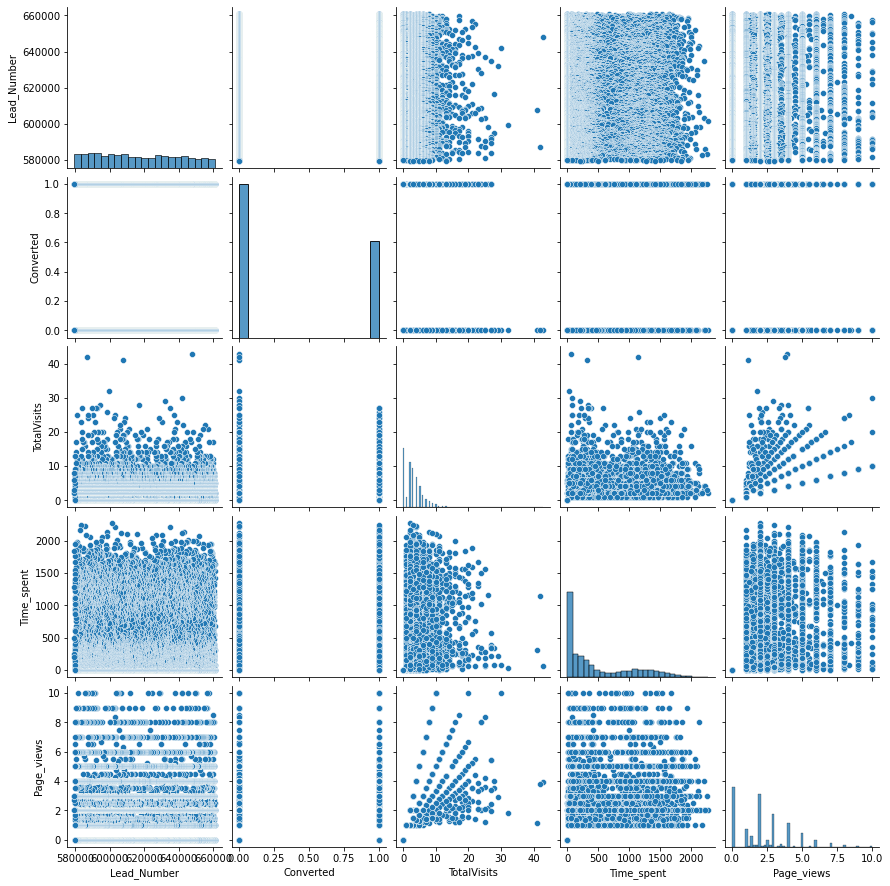

In [26]:
sns.pairplot(data=lead_data)
plt.show()

#### Numeric - Categorical

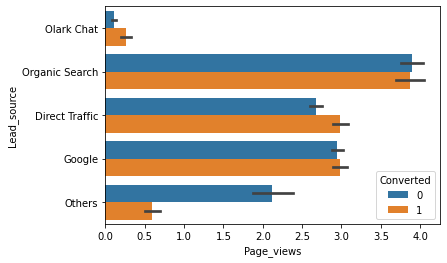

In [27]:
sns.barplot(data=lead_data,y='Lead_source',x='Page_views',hue='Converted')
plt.show()

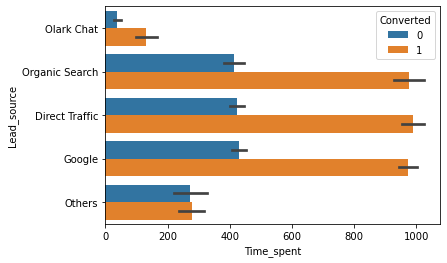

In [28]:
sns.barplot(data=lead_data,y='Lead_source',x='Time_spent',hue='Converted')
plt.show()

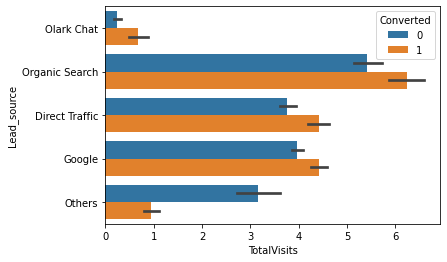

In [29]:
sns.barplot(data=lead_data,y='Lead_source',x='TotalVisits',hue='Converted')
plt.show()

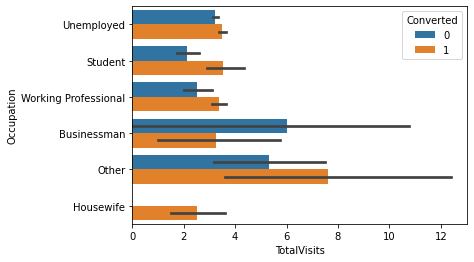

In [30]:
sns.barplot(data=lead_data,y='Occupation',x='TotalVisits',hue='Converted')
plt.show()

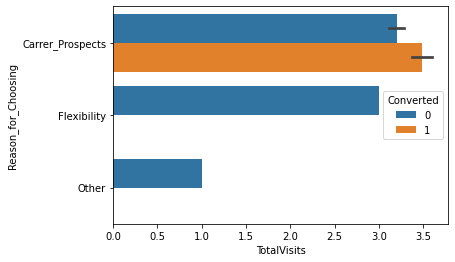

In [31]:
sns.barplot(data=lead_data,y='Reason_for_Choosing',x='TotalVisits',hue='Converted')
plt.show()

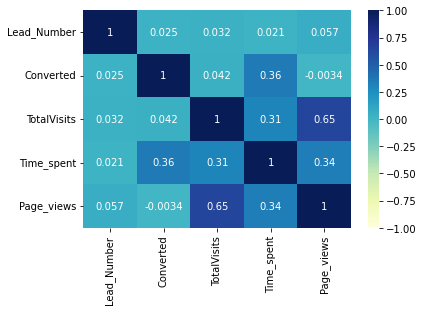

In [32]:
correlation = lead_data.corr()

sns.heatmap(correlation,cmap='YlGnBu',vmin=-1.0,vmax=1.0,center=0,annot=True)
plt.show()

### Inferences
[Table of Contents](#0.1)

- Numeric-Numeric
    - There seems to be a linear relationship between `TotalVisits` and `Pages vewed per visit`
- Numeric-Categorical
    - Leads who are sourced from organic search have high page views per visit and have the highest conversion, followed by Google and Direct Traffic
    - Leads who are sourced from organic search have spent most of the time on website  and have the highest conversion, followed by Google and Direct Traffic
    - Leads who are sourced from organic search have most number of visits on the website and have the highest conversion, followed by Google and Direct Traffic
    - Leads who are choosing the services for better prospects have high conversion 
- Heatmap
    - There is high positive correlation between TotalVists and Pages vewed per visit

### 5. Creating dummy variables<a ID="5"></a>
[Table of Contents](#0.1)

In [33]:
categorical_columns = []
for col in lead_data.columns:
    if lead_data[col].dtype == 'object':
        categorical_columns.append(col)

In [34]:
lead_data = pd.get_dummies(lead_data,columns=categorical_columns,drop_first=True)

In [35]:
lead_data.head()

,Lead_Number,Converted,TotalVisits,Time_spent,Page_views,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Others,No_email_Yes,No_calls_Yes,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,...,Forums_Yes,Newspaper_Yes,Ads_Yes,Recommendation_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Free_copy_Yes,Last_notable_activity_Email Bounced,Last_notable_activity_Email Link Clicked,Last_notable_activity_Email Marked Spam,Last_notable_activity_Email Opened,Last_notable_activity_Email Received,Last_notable_activity_Form Submitted on Website,Last_notable_activity_Had a Phone Conversation,Last_notable_activity_Modified,Last_notable_activity_Olark Chat Conversation,Last_notable_activity_Page Visited on Website,Last_notable_activity_Resubscribed to emails,Last_notable_activity_SMS Sent,Last_notable_activity_Unreachable,Last_notable_activity_Unsubscribed,Last_notable_activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
lead_data = lead_data.set_index('Lead_Number',drop=True)

### Defining X and y variables

In [37]:
y = lead_data.pop('Converted')
X = lead_data

print('Shape of X varible: ',X.shape)
print('Shape of y varible: ',y.shape)

Shape of X varible:  (9186, 126)
Shape of y varible:  (9186,)


In [38]:
### Splitting the data into Train and Test datasets

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [40]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (6430, 126)
Shape of X_test:  (2756, 126)
Shape of y_train:  (6430,)
Shape of y_test:  (2756,)


### 6. Rescaling Numerical features <a ID="6"></a>
[Table of Contents](#0.1)

In [41]:
X_test.head(3)

,TotalVisits,Time_spent,Page_views,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Others,No_email_Yes,No_calls_Yes,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,...,Forums_Yes,Newspaper_Yes,Ads_Yes,Recommendation_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Free_copy_Yes,Last_notable_activity_Email Bounced,Last_notable_activity_Email Link Clicked,Last_notable_activity_Email Marked Spam,Last_notable_activity_Email Opened,Last_notable_activity_Email Received,Last_notable_activity_Form Submitted on Website,Last_notable_activity_Had a Phone Conversation,Last_notable_activity_Modified,Last_notable_activity_Olark Chat Conversation,Last_notable_activity_Page Visited on Website,Last_notable_activity_Resubscribed to emails,Last_notable_activity_SMS Sent,Last_notable_activity_Unreachable,Last_notable_activity_Unsubscribed,Last_notable_activity_View in browser link Clicked
Lead_Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
588212,2.0,404,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
603462,2.0,32,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
649892,2.0,590,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
features = ['TotalVisits','Time_spent','Page_views',]

In [43]:
scaler = MinMaxScaler()

In [44]:
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

### 7. Feature Elimination using RFE <a ID="7"></a> 
[Table of Contents](#0.1)

In [45]:
rfe = RFE(estimator=LogisticRegression(),n_features_to_select=15)
rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 37),
 ('Time_spent', True, 1),
 ('Page_views', False, 54),
 ('Lead_Origin_Landing Page Submission', False, 25),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 31),
 ('Lead_Origin_Quick Add Form', False, 105),
 ('Lead_source_Google', False, 53),
 ('Lead_source_Olark Chat', False, 38),
 ('Lead_source_Organic Search', False, 55),
 ('Lead_source_Others', False, 52),
 ('No_email_Yes', True, 1),
 ('No_calls_Yes', False, 66),
 ('Country_Australia', False, 30),
 ('Country_Bahrain', False, 72),
 ('Country_Bangladesh', False, 43),
 ('Country_Belgium', False, 59),
 ('Country_Canada', False, 70),
 ('Country_China', False, 98),
 ('Country_Denmark', False, 103),
 ('Country_France', False, 64),
 ('Country_Germany', False, 15),
 ('Country_Ghana', False, 60),
 ('Country_Hong Kong', False, 13),
 ('Country_India', False, 65),
 ('Country_Indonesia', False, 111),
 ('Country_Italy', False, 9),
 ('Country_Kenya', False, 108),
 ('Country_Kuwait', False, 44

In [46]:
cols = X_train.columns[rfe.support_]

In [47]:
X_train = X_train[cols]
X_test = X_test[cols]

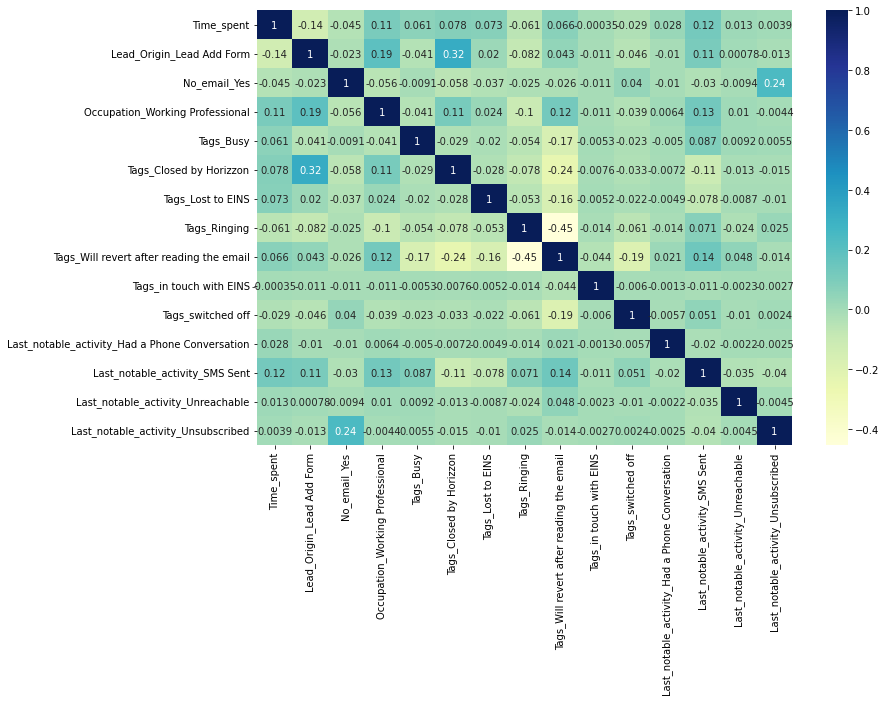

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.867713
0,Time_spent,1.826363
12,Last_notable_activity_SMS Sent,1.510398
1,Lead_Origin_Lead Add Form,1.347633
5,Tags_Closed by Horizzon,1.287447
3,Occupation_Working Professional,1.180037
7,Tags_Ringing,1.135447
2,No_email_Yes,1.128067
14,Last_notable_activity_Unsubscribed,1.071089
4,Tags_Busy,1.057292


### 8. Model Building<a ID="8"></a>
[Table of Contents](#0.1)

In [51]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

logm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6430
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1790.8
Date:                Sun, 26 Feb 2023   Deviance:                       3581.7
Time:                        20:56:53   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5387
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -5.4278      0.225    -24.152      0.000      -5.868      -4.987
Time_spent                                         4.4091      0.187     23.613      0.000       4.043       4.775
Lead_Origin_Lead Add Form                          3.5027      0.235     14.880      0.000       3.041       3.964
No_email_Yes                                      -1.5550      0.197     -7.875      0.000      -1.942      -1.168
Occupation_Working Professional                    2.7371      0.241     11.350      0.000       2.264       3.210
Tags_Busy                                          2.9032      0.310      9.358      0.000       2.295       3.511
Tags_Closed by Horizzon                            8.3109      0.753     11.031      0.000       6.834       9.788
Tags_Lost to EINS                                  7.6553      0.568     13.468      0.000       6.541       8.769
Tags_Ringing                                      -1.1723      0.319     -3.674      0.000      -1.798      -0.547
Tags_Will revert after reading the email           3.6703      0.215     17.054      0.000       3.248       4.092
Tags_in touch with EINS                            3.4579      0.967      3.577      0.000       1.563       5.353
Tags_switched off                                 -1.2260      0.643     -1.907      0.057      -2.486       0.034
Last_notable_activity_Had a Phone Conversation     3.8189      1.549      2.466      0.014       0.784       6.854
Last_notable_activity_SMS Sent                     2.6819      0.115     23.258      0.000       2.456       2.908
Last_notable_activity_Unreachable                  1.5641      0.523      2.990      0.003       0.539       2.589
Last_notable_activity_Unsubscribed                 2.0161      0.609      3.310      0.001       0.822       3.210
==================================================================================================================
"""

In [52]:
# Predicting on the train set and creating a DataFrame of Predicted Probabilities

y_train_pred = logm.predict(X_train_sm)

In [53]:
y_train_pred_df = pd.DataFrame({'Lead_Number':y_train_pred.index,'Converted':y_train.values,'Conveted_Prob':y_train_pred.values})

y_train_pred_df.head()

,Lead_Number,Converted,Conveted_Prob
0,586285,0,0.063363
1,655068,0,0.002139
2,626335,0,0.005184
3,589696,1,0.878786
4,641545,0,0.005378


In [54]:
# Predicting Conversion assuming a probability cutoff of 0.5

y_train_pred_df['Prediction'] = y_train_pred_df.Conveted_Prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_df.head()

,Lead_Number,Converted,Conveted_Prob,Prediction
0,586285,0,0.063363,0
1,655068,0,0.002139,0
2,626335,0,0.005184,0
3,589696,1,0.878786,1
4,641545,0,0.005378,0


### 9. Metrics on Training set and Finding Optimum Cutoff Probability <a ID="9"></a>
[Table of Contents](#0.1)

In [55]:
# Confusion matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Prediction)
print(confusion_matrix)

[[3692  278]
 [ 383 2077]]


### Accuracy Score

In [56]:
acc_score = round(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Prediction),3)

acc_score

0.897

In [57]:
print(confusion_matrix)

[[3692  278]
 [ 383 2077]]


In [58]:
TP = confusion_matrix[1,1] #True Positives
TN = confusion_matrix[0,0] #True Negatives
FP = confusion_matrix[0,1] #False Positives
FN = confusion_matrix[1,0] #False Negatives

### Senstivity

In [59]:
sensitivity = round(TP/float(TP + FN),2)
print(sensitivity)

0.84


### Specificity

In [60]:
specificity = round(TN/float(TN + FP),2)
print(specificity)

0.93


### Classification Report

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_train_pred_df.Converted, y_train_pred_df.Prediction))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3970
           1       0.88      0.84      0.86      2460

    accuracy                           0.90      6430
   macro avg       0.89      0.89      0.89      6430
weighted avg       0.90      0.90      0.90      6430



### ROC Curve

In [63]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_df.Converted, y_train_pred_df.Conveted_Prob, drop_intermediate = False )

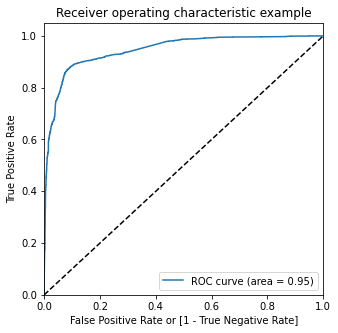

In [65]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Conveted_Prob)

### Finding Optimal Cutoff probability

In [66]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_df[i]= y_train_pred_df.Conveted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Lead_Number,Converted,Conveted_Prob,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,586285,0,0.063363,0,1,0,0,0,0,0,0,0,0,0
1,655068,0,0.002139,0,1,0,0,0,0,0,0,0,0,0
2,626335,0,0.005184,0,1,0,0,0,0,0,0,0,0,0
3,589696,1,0.878786,1,1,1,1,1,1,1,1,1,1,0
4,641545,0,0.005378,0,1,0,0,0,0,0,0,0,0,0


### Probabilty, Accuracy, Sensitivity, and Specificity at different cut-offs

In [67]:
cutoff = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.382582     1.000000     0.000000
0.1          0.1  0.712597     0.980488     0.546599
0.2          0.2  0.841369     0.915447     0.795466
0.3          0.3  0.892846     0.889024     0.895214
0.4          0.4  0.899222     0.867886     0.918640
0.5          0.5  0.897201     0.844309     0.929975
0.6          0.6  0.886159     0.798374     0.940554
0.7          0.7  0.877605     0.747561     0.958186
0.8          0.8  0.843857     0.623984     0.980101
0.9          0.9  0.810731     0.521545     0.989924


### Visualisation of the relation between the metrics

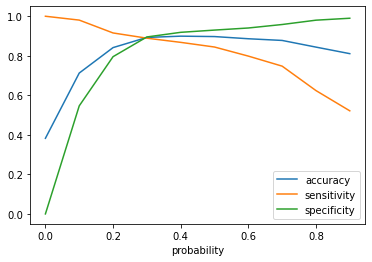

In [68]:
cutoff.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

### Precision and Recall tradeoff

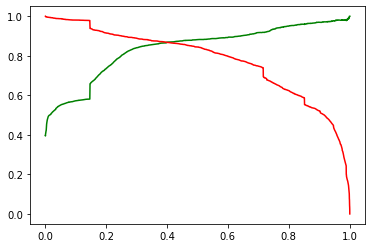

In [69]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Conveted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Selecting 0.4 as optimized cutoff point from the above graph

### 10. Making Predictions on Test Set<a ID="10"></a>
[Table of Contents](#0.1)

In [70]:
y_test_pred = logm.predict(X_test_sm)

y_test_pred

Lead_Number
588212    0.846636
603462    0.155074
649892    0.013616
607089    0.986265
627296    0.971441
            ...   
589157    0.931184
590504    0.164717
614828    0.006687
633440    0.147111
655079    0.166325
Length: 2756, dtype: float64

In [71]:
y_test_pred_df = pd.DataFrame({'Lead_Number':y_test.index,'Converted':y_test.values,'Predicted_Prob':y_test_pred.values})

y_test_pred_df.head()

,Lead_Number,Converted,Predicted_Prob
0,588212,0,0.846636
1,603462,0,0.155074
2,649892,0,0.013616
3,607089,1,0.986265
4,627296,1,0.971441


In [72]:
y_test_pred_df['Converted_Prediction'] = y_test_pred_df.Predicted_Prob.map(lambda x : 1 if x > 0.4 else 0)

In [73]:
y_test_pred_df.head()

,Lead_Number,Converted,Predicted_Prob,Converted_Prediction
0,588212,0,0.846636,1
1,603462,0,0.155074,0
2,649892,0,0.013616,0
3,607089,1,0.986265,1
4,627296,1,0.971441,1


### <font color = blue>Accuracy Score</font>

In [74]:
acc_score_test = round(metrics.accuracy_score(y_test_pred_df.Converted, y_test_pred_df.Converted_Prediction),3)

acc_score_test

0.892

In [75]:
y_test_pred_df.head()

,Lead_Number,Converted,Predicted_Prob,Converted_Prediction
0,588212,0,0.846636,1
1,603462,0,0.155074,0
2,649892,0,0.013616,0
3,607089,1,0.986265,1
4,627296,1,0.971441,1


In [76]:
confusion_matrix_test = metrics.confusion_matrix(y_test_pred_df.Converted, y_test_pred_df.Converted_Prediction)
print(confusion_matrix)

[[3692  278]
 [ 383 2077]]


In [77]:
TP = confusion_matrix_test[1,1] #True Positives
TN = confusion_matrix_test[0,0] #True Negatives
FP = confusion_matrix_test[0,1] #False Positives
FN = confusion_matrix_test[1,0] #False Negatives

### <font color = blue>Senstivity</font>

In [78]:
sensitivity_test = round(TP/float(TP + FN),2)
print(sensitivity_test)

0.86


### <font color = blue> Specificity</font>

In [79]:
specificity_test = round(TN/float(TN + FP),2)
print(specificity_test)

0.91


### <font color = blue>Classification Report </font>

In [80]:
print(classification_report(y_test_pred_df.Converted, y_test_pred_df.Converted_Prediction))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1675
           1       0.86      0.86      0.86      1081

    accuracy                           0.89      2756
   macro avg       0.89      0.89      0.89      2756
weighted avg       0.89      0.89      0.89      2756



### 11. Lead Score <a ID="11"></a>
[Table of Contents](#0.1)

### Train set

In [81]:
y_train_pred_df['Lead Score'] = y_train_pred_df.Conveted_Prob.map(lambda x: round(x*100))
y_train_pred_df[['Lead_Number','Lead Score']].head()

,Lead_Number,Lead Score
0,586285,6
1,655068,0
2,626335,1
3,589696,88
4,641545,1


### Test set

In [82]:
y_test_pred_df['Lead Score'] = y_test_pred_df.Predicted_Prob.map(lambda x: round(x*100))
y_test_pred_df[['Lead_Number','Lead Score']].head()

,Lead_Number,Lead Score
0,588212,85
1,603462,16
2,649892,1
3,607089,99
4,627296,97
